<a href="https://colab.research.google.com/github/asyahdin/Data_Analyst_Project/blob/main/P1_None_Linear_Regression_CO2emissions_230724.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-07-23 06:09:31--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2024-07-23 06:09:32 (2.85 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
import pandas as pd

df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.corr(numeric_only=True)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


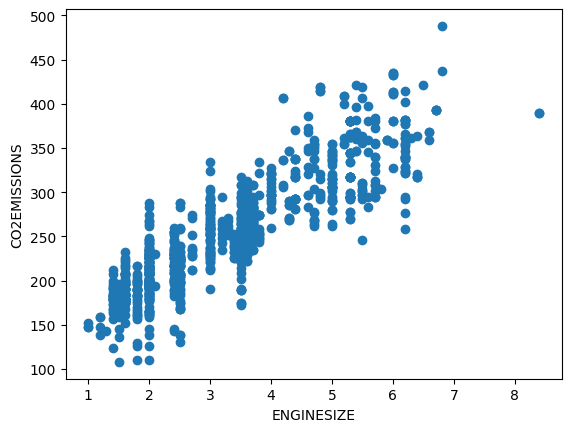

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'])
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [ ]:
import numpy as np

msk = np.random.rand(len(df)) < 0.75 #percentages 70% to 80% depends
train = df[msk]
test = df[~msk]

# Polynomial Regression

$$y = b + \theta\_1  x + \theta\_2 x^2$$

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#training the model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#2 is curve line of the distribution data #the higher degrees the more (sensitive = following the data)
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)

#Prediction the model
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

#Evaluation
from sklearn.metrics import r2_score

print('The R2-score: ', (r2_score(test_y, test_y_ ))*100)
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2-score:  76.03115165549876
The MSE is:  983.613952587911


Text(0, 0.5, 'Emission')

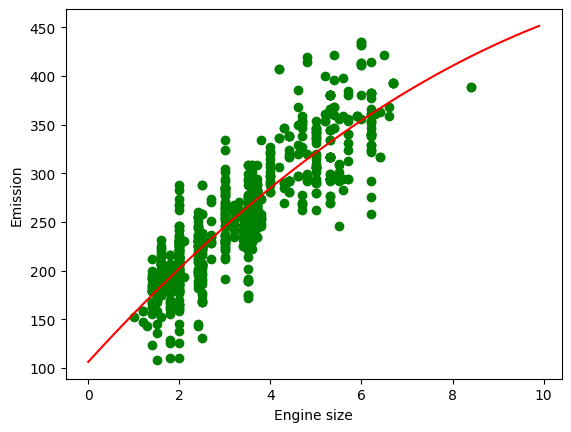

In [ ]:
#Polynomial degree (2)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='green')

XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)

plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
#2 is curve line of the distribution data #the higher degrees the more (sensitive = following the data)
poly4 = PolynomialFeatures(degree=7)
train_x_poly4 = poly4.fit_transform(train_x)

clf4 = linear_model.LinearRegression()
train_y_ = clf4.fit(train_x_poly4, train_y)

#Prediction the model

test_x_poly4 = poly4.fit_transform(test_x)
test_y_ = clf4.predict(test_x_poly4)

#Evaluation

print('The R2-score: ', (r2_score(test_y, test_y_ ))*100)
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2-score:  76.96010778891139
The MSE is:  945.4922121924702


Text(0, 0.5, 'Emission')

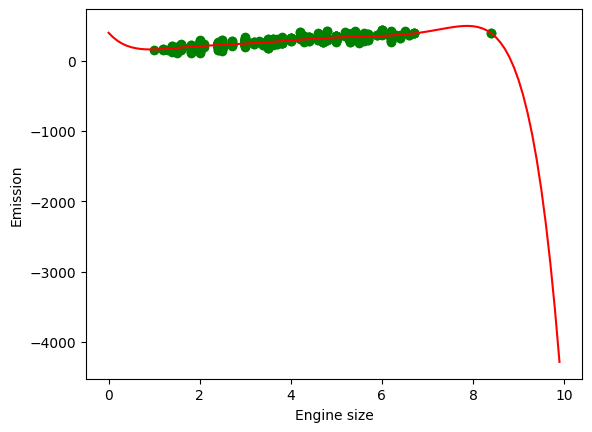

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='green')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf4.intercept_[0]+ clf4.coef_[0][1]*XX + clf4.coef_[0][2]*np.power(XX, 2) + clf4.coef_[0][3]*np.power(XX, 3) + clf4.coef_[0][4]*np.power(XX, 4) + clf4.coef_[0][5]*np.power(XX, 5)+ clf4.coef_[0][6]*np.power(XX, 6)+ clf4.coef_[0][7]*np.power(XX, 7)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#training the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#2 is curve line of the distribution data #the higher degrees the more (sensitive = following the data)
poly5 = PolynomialFeatures(degree=2)
train_x_poly = poly5.fit_transform(train_x)

clf5 = linear_model.LinearRegression()
train_y_ = clf5.fit(train_x_poly, train_y)

#Prediction the model
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly5.fit_transform(test_x)
test_y_ = clf5.predict(test_x_poly)

#Evaluation
from sklearn.metrics import r2_score

print('The R2-score: ', (r2_score(test_y, test_y_ ))*100)
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2-score:  85.40083484298766
The MSE is:  599.1085736861015


Text(0, 0.5, 'Emission')

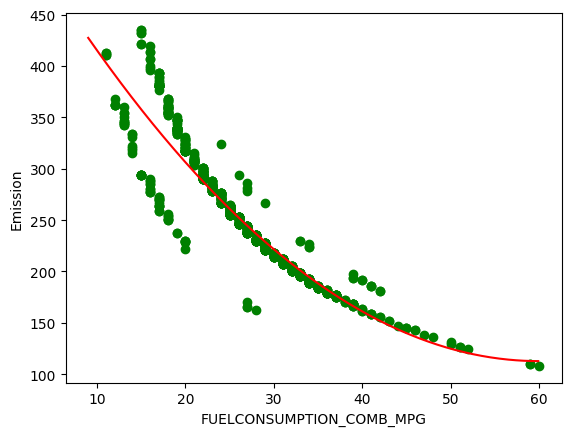

In [ ]:
#Polynomial degree (2)
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='green')

XX = np.arange(9.0, 60.0, 0.1)
yy = clf5.intercept_[0]+ clf5.coef_[0][1]*XX+ clf5.coef_[0][2]*np.power(XX, 2)

plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#training the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB_MPG']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#2 is curve line of the distribution data #the higher degrees the more (sensitive = following the data)
poly6 = PolynomialFeatures(degree=7)
train_x_poly = poly6.fit_transform(train_x)

clf6 = linear_model.LinearRegression()
train_y_ = clf6.fit(train_x_poly, train_y)

#Prediction the model
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB_MPG']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly6.fit_transform(test_x)
test_y_ = clf6.predict(test_x_poly)

#Evaluation
from sklearn.metrics import r2_score

print('The R2-score: ', (r2_score(test_y, test_y_ ))*100)
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2-score:  85.46899116592641
The MSE is:  596.3116303688387


Text(0, 0.5, 'Emission')

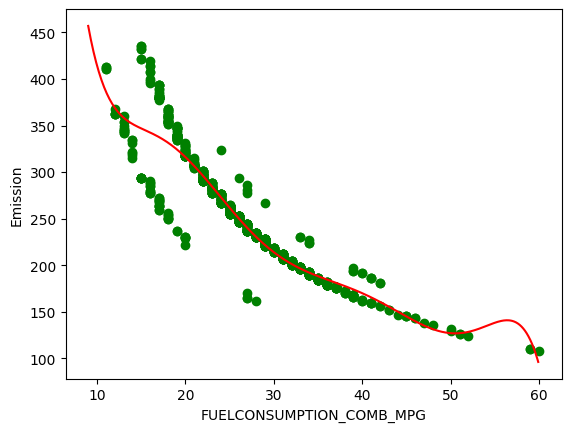

In [ ]:
plt.scatter(train.FUELCONSUMPTION_COMB_MPG, train.CO2EMISSIONS,  color='green')
XX = np.arange(9.0, 60.0, 0.1)
yy = clf6.intercept_[0]+ clf6.coef_[0][1]*XX + clf6.coef_[0][2]*np.power(XX, 2) + clf6.coef_[0][3]*np.power(XX, 3) + clf6.coef_[0][4]*np.power(XX, 4) + clf6.coef_[0][5]*np.power(XX, 5) + clf6.coef_[0][6]*np.power(XX, 6) + clf6.coef_[0][7]*np.power(XX, 7)
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#training the model
train_x = np.asanyarray(train[['CYLINDERS']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#2 is curve line of the distribution data #the higher degrees the more (sensitive = following the data)
poly7 = PolynomialFeatures(degree=9)
train_x_poly = poly7.fit_transform(train_x)

clf7 = linear_model.LinearRegression()
train_y_ = clf7.fit(train_x_poly, train_y)

#Prediction the model
test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly7.fit_transform(test_x)
test_y_ = clf7.predict(test_x_poly)

#Evaluation
from sklearn.metrics import r2_score

print('The R2-score: ', (r2_score(test_y, test_y_ ))*100)
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2-score:  75.87082301062938
The MSE is:  990.1933881046459


Text(0, 0.5, 'Emission')

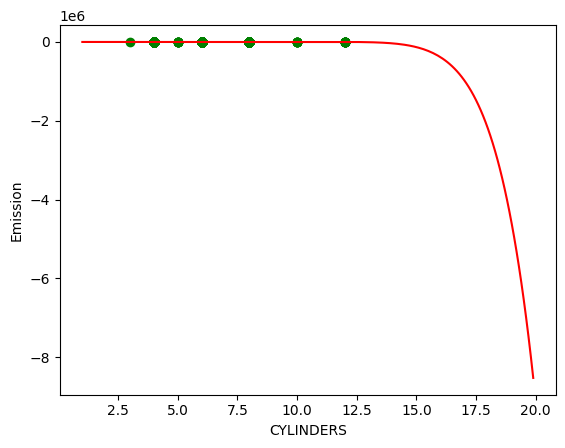

In [ ]:
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='green')
XX = np.arange(1.0, 20.0, 0.1)
yy = clf7.intercept_[0]+ clf7.coef_[0][1]*XX + clf7.coef_[0][2]*np.power(XX, 2) + clf7.coef_[0][3]*np.power(XX, 3) + clf7.coef_[0][4]*np.power(XX, 4) + clf7.coef_[0][5]*np.power(XX, 5) + clf7.coef_[0][6]*np.power(XX, 6) + clf7.coef_[0][7]*np.power(XX, 7) + clf7.coef_[0][8]*np.power(XX, 8) + clf7.coef_[0][9]*np.power(XX, 9)
plt.plot(XX, yy, '-r' )
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#training the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_CITY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#2 is curve line of the distribution data #the higher degrees the more (sensitive = following the data)
poly8 = PolynomialFeatures(degree=7)
train_x_poly = poly8.fit_transform(train_x)

clf8 = linear_model.LinearRegression()
train_y_ = clf8.fit(train_x_poly, train_y)

#Prediction the model
test_x = np.asanyarray(test[['FUELCONSUMPTION_CITY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly8.fit_transform(test_x)
test_y_ = clf8.predict(test_x_poly)

#Evaluation
from sklearn.metrics import r2_score

print('The R2-score: ', (r2_score(test_y, test_y_ ))*100)
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2-score:  85.17253075578405
The MSE is:  608.4775296901074


Text(0, 0.5, 'Emission')

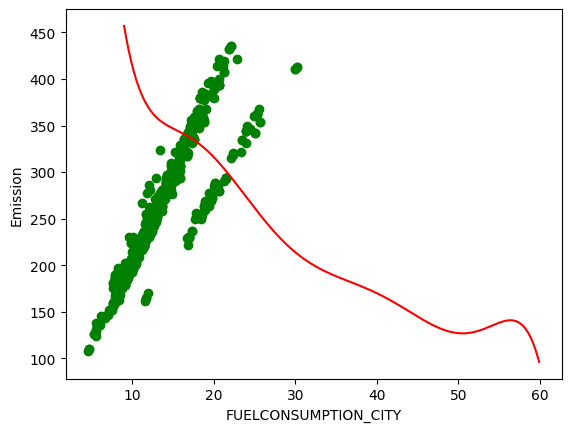

In [ ]:
plt.scatter(train.FUELCONSUMPTION_CITY, train.CO2EMISSIONS,  color='green')
XX = np.arange(9.0, 60.0, 0.1)
yy = clf6.intercept_[0]+ clf6.coef_[0][1]*XX + clf6.coef_[0][2]*np.power(XX, 2) + clf6.coef_[0][3]*np.power(XX, 3) + clf6.coef_[0][4]*np.power(XX, 4) + clf6.coef_[0][5]*np.power(XX, 5) + clf6.coef_[0][6]*np.power(XX, 6) + clf6.coef_[0][7]*np.power(XX, 7)
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emission")

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#training the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_HWY']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#2 is curve line of the distribution data #the higher degrees the more (sensitive = following the data)
poly9 = PolynomialFeatures(degree=2)
train_x_poly = poly9.fit_transform(train_x)

clf9 = linear_model.LinearRegression()
train_y_ = clf9.fit(train_x_poly, train_y)

#Prediction the model
test_x = np.asanyarray(test[['FUELCONSUMPTION_HWY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly9.fit_transform(test_x)
test_y_ = clf9.predict(test_x_poly)

#Evaluation
from sklearn.metrics import r2_score

print('The R2-score: ', (r2_score(test_y, test_y_ ))*100)
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2-score:  83.66930234109748
The MSE is:  670.1657852692092


Text(0, 0.5, 'Emission')

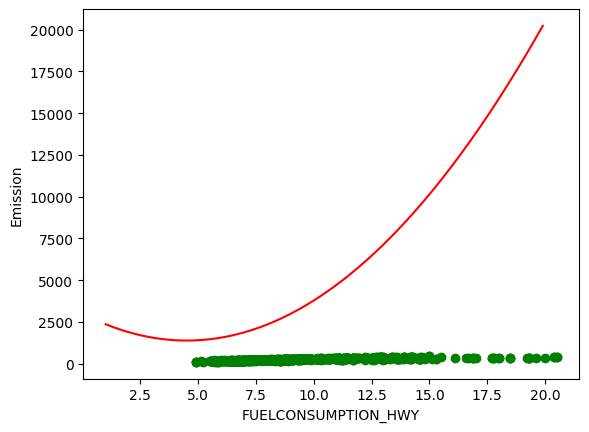

In [ ]:
plt.scatter(train.FUELCONSUMPTION_HWY, train.CO2EMISSIONS,  color='green')
XX = np.arange(1.0, 20.0, 0.1)
yy = clf6.intercept_[0]+ clf6.coef_[0][1]*XX + clf6.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel("Emission")

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#training the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#2 is curve line of the distribution data #the higher degrees the more (sensitive = following the data)
poly3 = PolynomialFeatures(degree=5)
train_x_poly = poly3.fit_transform(train_x)

clf3 = linear_model.LinearRegression()
train_y_ = clf3.fit(train_x_poly, train_y)

#Prediction the model
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly3.fit_transform(test_x)
test_y_ = clf3.predict(test_x_poly)

#Evaluation
from sklearn.metrics import r2_score

print('The R2-score: ', (r2_score(test_y, test_y_ ))*100)
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2-score:  86.10299213762322
The MSE is:  570.2940181434959


Text(0, 0.5, 'Emission')

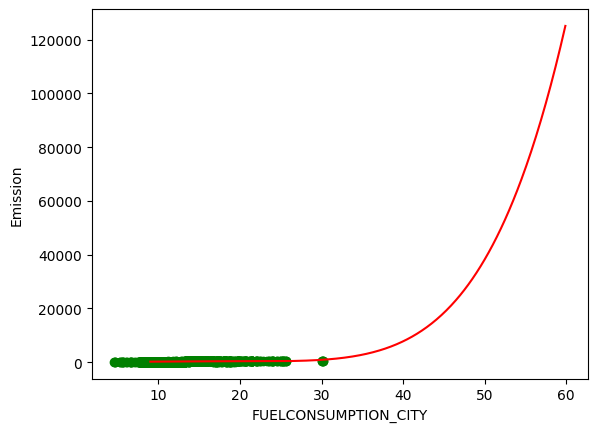

In [ ]:
plt.scatter(train.FUELCONSUMPTION_CITY, train.CO2EMISSIONS,  color='green')
XX = np.arange(9.0, 60.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3) + clf3.coef_[0][4]*np.power(XX, 4) + clf3.coef_[0][5]*np.power(XX, 5)
plt.plot(XX, yy, '-r' )
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emission")

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#training the model
train_x = np.asanyarray(train[['FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

#2 is curve line of the distribution data #the higher degrees the more (sensitive = following the data)
poly3 = PolynomialFeatures(degree=5)
train_x_poly = poly3.fit_transform(train_x)

clf3 = linear_model.LinearRegression()
train_y_ = clf3.fit(train_x_poly, train_y)

#Prediction the model
test_x = np.asanyarray(test[['FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly3.fit_transform(test_x)
test_y_ = clf3.predict(test_x_poly)

#Evaluation
from sklearn.metrics import r2_score

print('The R2-score: ', (r2_score(test_y, test_y_ ))*100)
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))

The R2-score:  86.10299213694111
The MSE is:  570.2940181714879
